# 1. Import libraries

In [1]:
import io
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')

# 2. Import datasets

In [3]:
df1 = pd.read_csv("../inputs/applicant.csv")
df1['account'] = df1['applicant_id']
df1['age'] = df1['Primary_applicant_age_in_years']
df1['sex'] = df1['Gender']
df1['status'] = df1['Marital_status']
df1['dependents'] = df1['Number_of_dependents']
df1['house'] = df1['Housing']
df1['house_years'] = df1['Years_at_current_residence']
df1['employ'] = df1['Employment_status']

df1['employ_year'] = np.where(df1['Has_been_employed_for_at_least']=='7 years', '7 years or more',
                              np.where(df1['Has_been_employed_for_at_least']=='4 years', '4 to 6 years',
                                       np.where(df1['Has_been_employed_for_at_least']=='1 year', '1 to 3 years',
                                                np.where(df1['Has_been_employed_for_at_least']=='0 year', '0 to 1 years', 'MISSING'))))
df1['balance'] = np.where(df1['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=='2 lac', '2 lac or more',
                              np.where(df1['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=='2 lac', '2 lac or less', 'MISSING'))
df1 = df1[['account', 'age', 'sex', 'status', 'dependents', 'house', 'house_years', 'employ', 'employ_year', 'balance']]
df1.shape

(1000, 10)

In [4]:
df2 = pd.read_csv("../inputs/loan.csv")
df2['loan'] = df2['loan_application_id']
df2['account'] = df2['applicant_id']
df2['months'] = df2['Months_loan_taken_for']
df2['purpose'] = df2['Purpose'].fillna('MISSING')
df2['loan_amount'] = df2['Principal_loan_amount']
df2['emi_pct'] = df2['EMI_rate_in_percentage_of_disposable_income']
df2['emi_plan'] = df2['Other_EMI_plans'].fillna('MISSING')

df2['property'] = df2['Property'].fillna('MISSING')
df2['coapplicant'] = np.where(df2['Has_coapplicant']==0, 'N', 'Y')
df2['guarantor'] = np.where(df2['Has_guarantor']==0, 'N', 'Y')
df2['history'] = df2['Loan_history']
df2['Y'] = df2['high_risk_applicant']
df2 = df2[['loan', 'account', 'months', 'purpose', 'loan_amount', 'emi_pct', 'emi_plan', 'property', 
           'coapplicant', 'guarantor', 'history', 'Y']]
df2.shape

(1000, 12)

# 3. Clean

In [5]:
df3 = pd.merge(df1, df2, how='left', on='account')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
account        1000 non-null int64
age            1000 non-null int64
sex            1000 non-null object
status         1000 non-null object
dependents     1000 non-null int64
house          1000 non-null object
house_years    1000 non-null int64
employ         1000 non-null object
employ_year    1000 non-null object
balance        1000 non-null object
loan           1000 non-null object
months         1000 non-null int64
purpose        1000 non-null object
loan_amount    1000 non-null int64
emi_pct        1000 non-null int64
emi_plan       1000 non-null object
property       1000 non-null object
coapplicant    1000 non-null object
guarantor      1000 non-null object
history        1000 non-null object
Y              1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 171.9+ KB


In [6]:
num = df3[df3['Y']==1].shape[0]
dem = df3.shape[0]
print('Default Rate :', np.round(num/dem*100, 3), '%')
print(df3['Y'].value_counts())

Default Rate : 30.0 %
0    700
1    300
Name: Y, dtype: int64


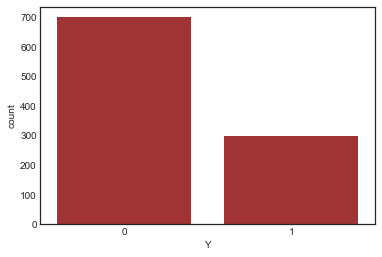

In [7]:
sns.countplot(df3['Y'], color='firebrick');

# 5. Export Dataset

In [8]:
df3.to_csv('../outputs/cleaned.csv', index=False)
df3.shape

(1000, 21)